In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import cv2
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import sklearn
import os
import glob

In [2]:
#inputs:
video1_in = './my_data/fadi.mp4'
video2_in = './my_data/superman.mp4'

bg_file = './my_data/room.jpg'

place1 = [600, 200]
place2 = [2000, 3000]

video_out = 'output/video.mp4'


In [3]:
FRAMES_COUNT = 220
fadi_frames_dir = './output/fadi_frames/'
spiderman_frames_dir = './output/spiderman_frames/'
video_frames_dir = './output/video_frames/' 

#samples
i1 = 40
i2 = 150

In [3]:
model = torch.hub.load('pytorch/vision:v0.5.0', 'deeplabv3_resnet101', pretrained=True)
model.eval()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
model = model.to(device)

Using cache found in /Users/ameerabuhanna/.cache/torch/hub/pytorch_vision_v0.5.0


In [4]:
def deep_seg(image, model, preprocess):
    im_in = preprocess(image).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(im_in)['out'][0]
    out = output.argmax(0).cpu().numpy()
    return out

In [5]:
vgg16 = models.vgg16(pretrained=True, progress=True).to(device)

In [6]:
def getFrame(v, sec, d_out, cnt, rotate):
    v.set(cv2.CAP_PROP_POS_MSEC,sec*75)
    hasFrames,image = v.read()
    if hasFrames:
        if rotate is not None:
            image = cv2.rotate(image, rotate)
        f_name = d_out + "image"+str(cnt)+".jpg"
        cv2.imwrite(f_name, image)     # save frame as JPG file
    return hasFrames

def save_videa_as_frames(f_in, d_out, rotate=None):
    os.makedirs(d_out, exist_ok=True)
    v=cv2.VideoCapture(f_in)
    sec = 0
    frameRate = 0.5
    count=1
    success = getFrame(v, sec, d_out, count, rotate)
    while success:
        count = count + 1
        sec = sec + frameRate
        sec = round(sec, 2)
        success = getFrame(v, sec, d_out, count, rotate)

In [7]:
save_videa_as_frames(video1_in, fadi_frames_dir, rotate=cv2.ROTATE_90_CLOCKWISE)
save_videa_as_frames(video2_in, spiderman_frames_dir)

In [8]:
def display_sample(im1, im2, fr1_num, fr2_num):
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(1,2,1)
    ax.imshow(im1)
    ax.set_title(f'frame {fr1_num}')
    ax.set_axis_off()
    ax = fig.add_subplot(1,2,2)
    ax.imshow(im2)
    ax.set_title(f'frame {fr2_num}')
    ax.set_axis_off()

def show_sample(im1_path, im2_path, fr1_num, fr2_num):
    display_sample(cv2.cvtColor(im1_path, cv2.COLOR_BGR2RGB), cv2.cvtColor(im2_path, cv2.COLOR_BGR2RGB), fr1_num, fr2_num)
    

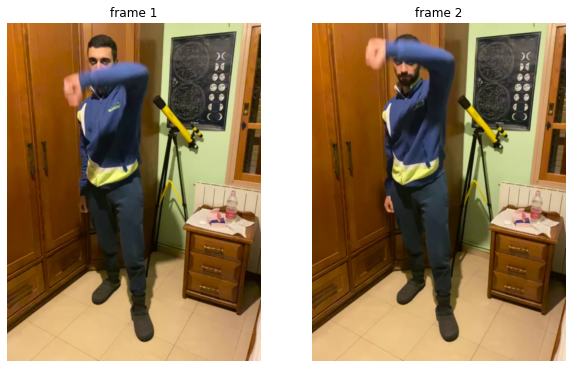

In [9]:
frame1 = cv2.imread(f'{fadi_frames_dir}/image{i1}.jpg')
frame2 = cv2.imread(f'{fadi_frames_dir}/image{i2}.jpg')
show_sample(frame1, frame2, i1, i2)

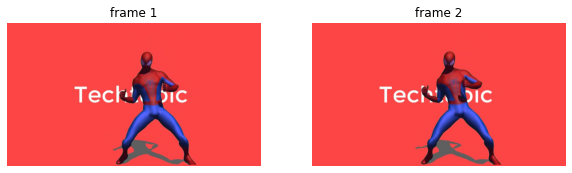

In [10]:
frame1 = cv2.imread(f'{spiderman_frames_dir}/image{i1}.jpg')
frame2 = cv2.imread(f'{spiderman_frames_dir}/image{i2}.jpg')
show_sample(frame1, frame2, i1, i2)

In [11]:
def keep_main(mask):
    mask = (mask > 0).astype(np.uint8)
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)
    new_mask = np.zeros((output.shape))
    sizes = stats[1:, -1]; nb_components = nb_components - 1
    max_idx = np.argmax(sizes)
    new_mask[output == max_idx + 1] = 255
    return new_mask

In [12]:
fseg = {}
for i in range(1, FRAMES_COUNT):
    fname = 'image'+str(i)
    frame = cv2.imread(fadi_frames_dir+fname+'.jpg')
    fseg[i] = keep_main(deep_seg(frame, model, preprocess))
    print(fname)

image1
image2
image3
image4
image5
image6
image7
image8
image9
image10
image11
image12
image13
image14
image15
image16
image17
image18
image19
image20
image21
image22
image23
image24
image25
image26
image27
image28
image29
image30
image31
image32
image33
image34
image35
image36
image37
image38
image39
image40
image41
image42
image43
image44
image45
image46
image47
image48
image49
image50
image51
image52
image53
image54
image55
image56
image57
image58
image59
image60
image61
image62
image63
image64
image65
image66
image67
image68
image69
image70
image71
image72
image73
image74
image75
image76
image77
image78
image79
image80
image81
image82
image83
image84
image85
image86
image87
image88
image89
image90
image91
image92
image93
image94
image95
image96
image97
image98
image99
image100
image101
image102
image103
image104
image105
image106
image107
image108
image109
image110
image111
image112
image113
image114
image115
image116
image117
image118
image119
image120
image121
image122
image123
i

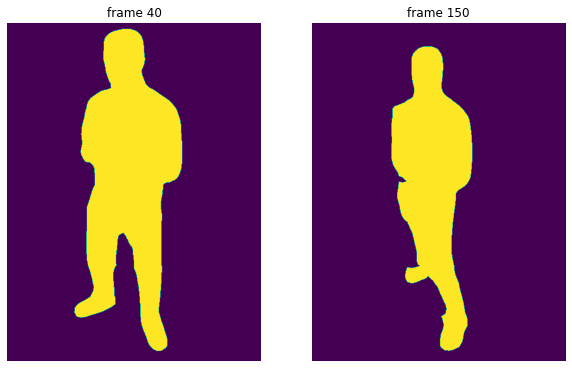

In [20]:
display_sample(fseg[i1], fseg[i2], i1, i2)

In [14]:
spiderman_fseg = {}
for i in range(1, FRAMES_COUNT):
    fname = f'image{i}'
    print(fname)
    frame = cv2.imread(spiderman_frames_dir+fname+'.jpg')
    spiderman_fseg[i] = deep_seg(frame, model, preprocess)

image1
image2
image3
image4
image5
image6
image7
image8
image9
image10
image11
image12
image13
image14
image15
image16
image17
image18
image19
image20
image21
image22
image23
image24
image25
image26
image27
image28
image29
image30
image31
image32
image33
image34
image35
image36
image37
image38
image39
image40
image41
image42
image43
image44
image45
image46
image47
image48
image49
image50
image51
image52
image53
image54
image55
image56
image57
image58
image59
image60
image61
image62
image63
image64
image65
image66
image67
image68
image69
image70
image71
image72
image73
image74
image75
image76
image77
image78
image79
image80
image81
image82
image83
image84
image85
image86
image87
image88
image89
image90
image91
image92
image93
image94
image95
image96
image97
image98
image99
image100
image101
image102
image103
image104
image105
image106
image107
image108
image109
image110
image111
image112
image113
image114
image115
image116
image117
image118
image119
image120
image121
image122
image123
i

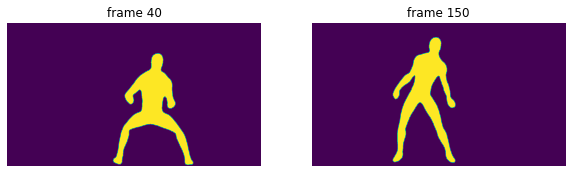

In [21]:
display_sample(spiderman_fseg[i1], spiderman_fseg[i2], i1, i2)

In [23]:
os.makedirs(video_frames_dir, exist_ok=True)

room = cv2.imread(room_file)
hight, width, _ = room.shape

for i in range(1, FRAMES_COUNT):
    fname = f'image{i}.jpg'
    print(fname)
    spiderman_frame = cv2.imread(spiderman_frames_dir+fname)
    spiderman_seg = spiderman_fseg[i]
    
    fadi_frame = cv2.imread(fadi_frames_dir+fname)
    fadi_seg = fseg[i]
    
    fadi_idxs = np.argwhere(fadi_seg)
    spiderman_idxs = np.argwhere(spiderman_seg)
    
    frame = cv2.resize(room, (width*5, hight*5))
    for idx in spiderman_idxs:
        x = place2[0]+idx[0]
        y = place2[1]+idx[1]
        frame[x, y] = spiderman_frame[idx[0], idx[1]]

    frame = cv2.resize(frame, (width*2, hight*2))
    for idx in fadi_idxs:
        x = place1[0]+idx[0]
        y = place1[1]+idx[1]
        frame[x , y] = fadi_frame[idx[0], idx[1]]
        
    cv2.imwrite(video_frames_dir + fname, frame)

image1.jpg
image2.jpg
image3.jpg
image4.jpg
image5.jpg
image6.jpg
image7.jpg
image8.jpg
image9.jpg
image10.jpg
image11.jpg
image12.jpg
image13.jpg
image14.jpg
image15.jpg
image16.jpg
image17.jpg
image18.jpg
image19.jpg
image20.jpg
image21.jpg
image22.jpg
image23.jpg
image24.jpg
image25.jpg
image26.jpg
image27.jpg
image28.jpg
image29.jpg
image30.jpg
image31.jpg
image32.jpg
image33.jpg
image34.jpg
image35.jpg
image36.jpg
image37.jpg
image38.jpg
image39.jpg
image40.jpg
image41.jpg
image42.jpg
image43.jpg
image44.jpg
image45.jpg
image46.jpg
image47.jpg
image48.jpg
image49.jpg
image50.jpg
image51.jpg
image52.jpg
image53.jpg
image54.jpg
image55.jpg
image56.jpg
image57.jpg
image58.jpg
image59.jpg
image60.jpg
image61.jpg
image62.jpg
image63.jpg
image64.jpg
image65.jpg
image66.jpg
image67.jpg
image68.jpg
image69.jpg
image70.jpg
image71.jpg
image72.jpg
image73.jpg
image74.jpg
image75.jpg
image76.jpg
image77.jpg
image78.jpg
image79.jpg
image80.jpg
image81.jpg
image82.jpg
image83.jpg
image84.jpg
i

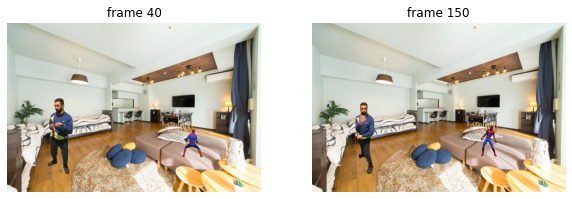

In [9]:
frame1 = cv2.imread(f'{video_frames_dir}/image{i1}.jpg')
frame2 = cv2.imread(f'{video_frames_dir}/image{i2}.jpg')
show_sample(frame1, frame2, i1, i2)

In [10]:
img_array = []
for i in range(1, FRAMES_COUNT):
    fname = f'{video_frames_dir}/image{i}.jpg'
#     print(fname)
    img = cv2.imread(fname)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
    

output/video.mp4 saved


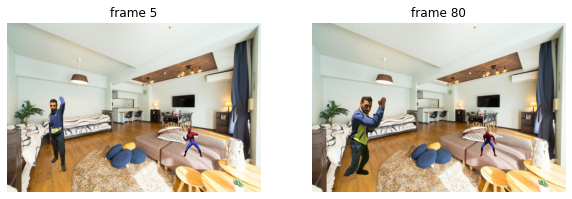

In [25]:
video = cv2.VideoWriter(video_out, cv2.VideoWriter_fourcc(*'DIVX'), 30, size)
for i in range(len(img_array)):
    video.write(img_array[i])
cv2.destroyAllWindows()
video.release()
print(f'{video_out} saved')